In [2]:
import pandas as pd
import numpy as np


In [3]:
rs_data = pd.read_csv('D:/ML_practice/Real Estate/Real_estate.csv')

In [4]:
rs_data.head(4)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8


In [5]:
rs_data.duplicated().any()

False

In [6]:
rs_data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
re_data=rs_data.drop(['No','X1 transaction date'], axis=1)

In [8]:
re_data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
#####DROP ROW LOGIC###

In [10]:
res = re_data.head()
index_name = res[res['X4 number of convenience stores']>9].index
print(index_name)

res.drop(index_name,inplace = True)
res

Int64Index([0], dtype='int64')


D:\DA\Anaconda\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,19.5,306.5947,9,24.98034,121.53951,42.2
2,13.3,561.9845,5,24.98746,121.54391,47.3
3,13.3,561.9845,5,24.98746,121.54391,54.8
4,5.0,390.5684,5,24.97937,121.54245,43.1


In [11]:
#########################

In [12]:
re_data.head(3)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3


In [13]:
#Exploratory data analysis#

((array([-2.93404699, -2.64700315, -2.48520948, -2.37028903, -2.28011537,
         -2.20537901, -2.14124641, -2.08487295, -2.03443757, -1.98870151,
         -1.94678245, -1.90802887, -1.87194548, -1.83814658, -1.80632575,
         -1.77623535, -1.74767225, -1.7204677 , -1.69447993, -1.66958862,
         -1.64569074, -1.62269739, -1.60053129, -1.5791248 , -1.5584184 ,
         -1.53835942, -1.51890098, -1.50000123, -1.48162258, -1.46373119,
         -1.44629645, -1.42929057, -1.41268829, -1.39646651, -1.3806041 ,
         -1.36508166, -1.34988134, -1.33498667, -1.32038242, -1.30605447,
         -1.29198974, -1.27817605, -1.26460204, -1.25125712, -1.23813139,
         -1.22521557, -1.21250097, -1.19997942, -1.18764324, -1.17548519,
         -1.16349846, -1.15167662, -1.14001357, -1.12850357, -1.11714117,
         -1.10592119, -1.09483873, -1.08388913, -1.07306797, -1.06237102,
         -1.05179428, -1.0413339 , -1.03098624, -1.02074782, -1.01061529,
         -1.00058547, -0.99065531, -0.

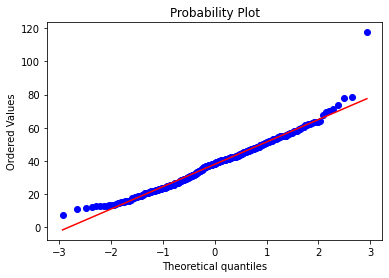

In [14]:
from scipy import stats
import scipy as scipy
import matplotlib.pyplot as plt
stats.probplot(re_data['Y house price of unit area'],plot=plt)

In [15]:
from scipy.stats import shapiro ###normality test
def check_normality(data):
    stats,p_value = shapiro(data)
    alpha=0.5
    
    if p_value>0.5:
        print("Normality: Gaussian, data is normal distributed, failed to reject null hypothesis ")
    else:
        print("Normality: Non Gaussian, data is not normal distributed, reject null hypothesis ")
        
check_normality(re_data)
        

Normality: Non Gaussian, data is not normal distributed, reject null hypothesis 


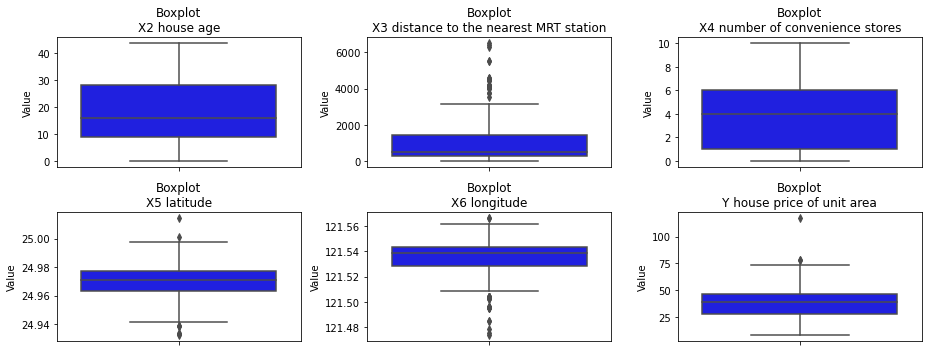

In [16]:
###boxplot## ##to check outliers

import seaborn as sns
plt.figure(figsize=(13,5))
for feat, grd in zip(re_data, range(231,237)):
  plt.subplot(grd)
  sns.boxplot(y=re_data[feat], color='blue')
  plt.ylabel('Value')
  plt.title('Boxplot\n%s'%feat)
plt.tight_layout()


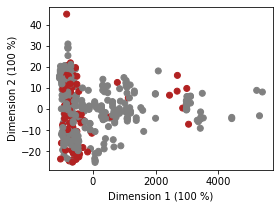

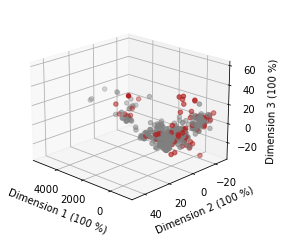

In [17]:
###Dropping Outliers
#####outlier defined by DBSCAN Clustering

from hdbscan import (HDBSCAN,hdbscan)
                     

hdb = HDBSCAN(min_cluster_size=2)
hdb_pred = hdb.fit_predict(re_data)
#data color
col_cl = ['grey'] * len(hdb_pred)

#defining outlier (index and color)
index_outlier = []
for i, out in zip(range(len(re_data)), hdb_pred):
  if out == -1:               
    index_outlier.append(i)   #index of data defined as outlier
    col_cl[i] = 'firebrick'       #outlier defined as black
    

    
#data plot (2D and 3D)
def data_scatter(data_, pca, n_dim, ax, color):
  if(n_dim == 2):
    plt.scatter(data_[:,0], data_[:,1], color=color)    #plot 2D
  else:
    ax.scatter(data_[:,0], data_[:,1], data_[:,2], color=color)  #plot 3D
    ax.set_zlabel('Dimension 3 (%.f %%)' % (round(pca.explained_variance_ratio_.cumsum()[2], 2)*100)) #third principal component
  plt.xlabel('Dimension 1 (%.f %%)' % (round(pca.explained_variance_ratio_.cumsum()[0], 2)*100)) #first principal component
  plt.ylabel('Dimension 2 (%.f %%)' % (round(pca.explained_variance_ratio_.cumsum()[1], 2)*100)) #second principal component
    
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
pca = PCA()
pca_data_ = pca.fit_transform(re_data)

#2D data plot
ax = plt.figure(figsize=(4, 3))
data_scatter(pca_data_, pca, 2, ax, col_cl)

#3D data plot
fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)
data_scatter(pca_data_, pca, 3, ax, col_cl)

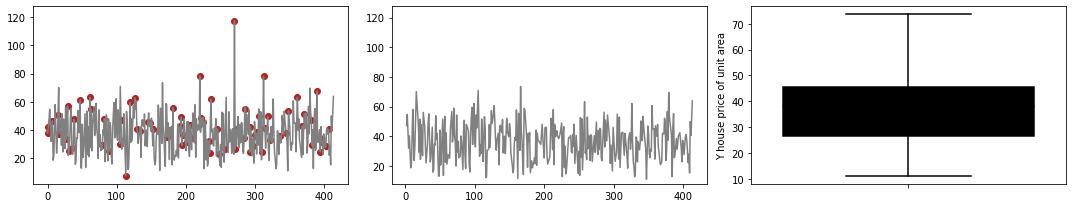

In [18]:
#visualizing data (without outliers)
plt.figure(figsize=(15, 3))

#plot old data
plt.subplot(131)
plt.plot(re_data['Y house price of unit area'], color='grey')
plt.ylim(top=np.max(re_data['Y house price of unit area'])+10)
plt.scatter(index_outlier, re_data.loc[index_outlier]['Y house price of unit area'], color='firebrick')    #plotting outliers

#defining new data
new_data = re_data.drop(index_outlier)

#plot new data
plt.subplot(132)
plt.plot(new_data['Y house price of unit area'], color='grey')
plt.ylim(top=np.max(re_data['Y house price of unit area'])+10)

#new house price values boxplot plot
plt.subplot(133)
sns.boxplot(y=new_data['Y house price of unit area'], color='black')

plt.tight_layout()

In [19]:
data = new_data.reset_index()
data.describe()

,index,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,205.436202,17.052819,1164.679430,3.946588,24.968309,121.532481,36.928190
std,119.292244,10.893199,1304.871242,2.886256,0.012306,0.016118,12.875854
min,2.000000,0.000000,23.382840,0.000000,24.938850,121.473530,11.200000
25%,101.000000,8.900000,289.324800,1.000000,24.962990,121.518120,26.600000
50%,203.000000,15.700000,533.476200,4.000000,24.969450,121.538420,38.100000
75%,311.000000,26.600000,1712.632000,6.000000,24.977440,121.543200,45.700000
max,413.000000,41.300000,6488.021000,10.000000,25.001150,121.566270,73.600000


In [20]:
print('checking normality after removing outliers')
check_normality(data)

checking normality after removing outliers
Normality: Non Gaussian, data is not normal distributed, reject null hypothesis 


In [21]:
###Correlation Matrix###

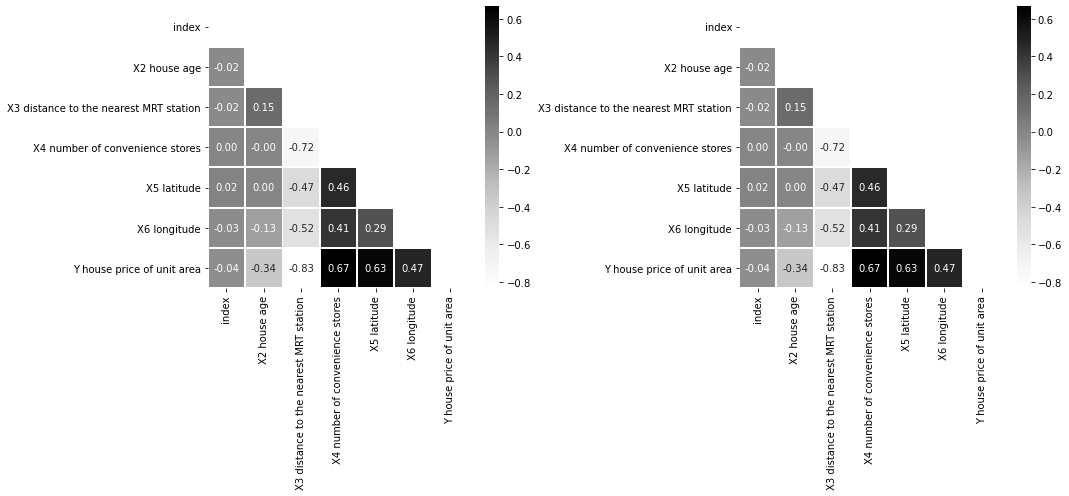

In [22]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

#correlation matrix
mask = np.triu(np.ones_like(data.corr())) 

plt.figure(figsize=(15, 7))

plt.subplot(121)
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=.9, fmt= '.2f', cmap='Greys', mask=mask) 

plt.subplot(122)
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=.9, fmt= '.2f', cmap='Greys', mask=mask) 

plt.tight_layout()

In [23]:
###Feature comparison (dependence)

#dependent and independent features

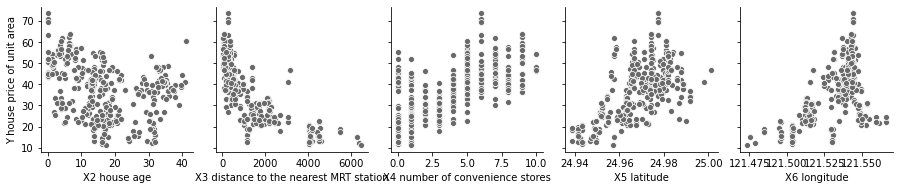

In [24]:
sns.pairplot(data, y_vars='Y house price of unit area', palette = sns.set_palette(['#696969']),
             x_vars=['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']);


In [25]:
###Linear Regression###

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict

data.head()

,index,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2,13.3,561.9845,5,24.98746,121.54391,47.3
1,3,13.3,561.9845,5,24.98746,121.54391,54.8
2,4,5.0,390.5684,5,24.97937,121.54245,43.1
3,5,7.1,2175.0300,3,24.96305,121.51254,32.1
4,6,34.5,623.4731,7,24.97933,121.53642,40.3


In [41]:
#dropping columns
x = data.loc[:,'X2 house age' : 'X6 longitude']
y = data.loc[:,'Y house price of unit area']

x.head()


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,13.3,561.9845,5,24.98746,121.54391
1,13.3,561.9845,5,24.98746,121.54391
2,5.0,390.5684,5,24.97937,121.54245
3,7.1,2175.0300,3,24.96305,121.51254
4,34.5,623.4731,7,24.97933,121.53642


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
regr = LinearRegression().fit(x_train,y_train)
price_prediction = regr.predict(x_test)

In [44]:
#regression coefficients
index_reg = ['Intercept', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X4 number of convenience stores', 'X6 longitude']
pd.DataFrame(data=np.append(regr.intercept_, regr.coef_), index=index_reg, columns=['values']).transpose()

,Intercept,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X4 number of convenience stores,X6 longitude
values,-6945.654033,-0.396326,-0.003931,1.343136,273.142628,1.385861


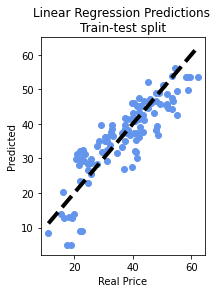

In [45]:
#Predictions plot
plt.figure(figsize=(10,4))

def plot_regression(real, predicted, color, title):
  plt.scatter(real, predicted, color=color)
  plt.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=4)
  plt.xlabel('Real Price')
  plt.ylabel('Predicted')
  plt.title(title)


#Real price vs train-test predictions plot (without outliers)
plt.subplot(131)
plot_regression(y_test, price_prediction, 'cornflowerblue', 'Linear Regression Predictions \nTrain-test split')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
#R2 coefficient, MAE and MSE measures
print('Test split evaluation \n',
      'Coefficient of determination R2: %.3f \n' % r2_score(y_test, price_prediction),
      'Mean Absolute Error: %.2f \n' % (sum(abs(y_test - price_prediction)) / len(y_test)),    
      'Mean Square Error: %.2f' % mean_squared_error(y_test, price_prediction))

Test split evaluation 
 Coefficient of determination R2: 0.741 
 Mean Absolute Error: 4.88 
 Mean Square Error: 35.92


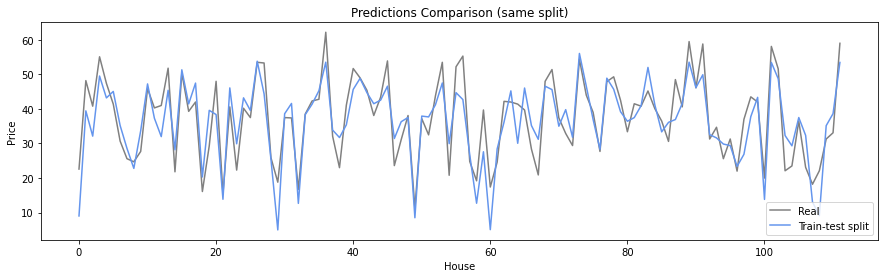

Euclidean distance between prices
- Real vs train-test: 63.428


In [50]:
#Predictions comparison plot
plt.figure(figsize=(15,4))

plt.plot(np.array(y_test), color='grey', label='Real')
plt.plot(price_prediction, color='cornflowerblue', label='Train-test split')
plt.xlabel('House')
plt.ylabel('Price')
plt.title('Predictions Comparison (same split)')
plt.legend(loc=4)
plt.show()


from scipy.spatial import distance


#Predictions distance (in general)
print('Euclidean distance between prices')
print('- Real vs train-test: %.3f' % distance.euclidean(y_test, price_prediction))